# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Sefza Auma Alam
- Email: sefzaauma59@gmail.com
- Id Dicoding: sefzaauma

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 : Bagaimana perbandingan cnt berdasarkan season per tahunnya.
- pertanyaan 2 : Bagaimana trend dari penyewaan atau cnt berdasarkan cuaca atau weathersit.

## Import Semua Packages/Library yang Digunakan

In [1]:
#import library yang dibutuhkan
import kagglehub
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/bike-sharing-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/lakshmi25npathi/bike-sharing-dataset/versions/1


In [3]:
 # Sesuaikan dengan path hasil unduhan

path = "/root/.cache/kagglehub/datasets/lakshmi25npathi/bike-sharing-dataset/versions/1"

# Tampilkan isi folder untuk mengetahui nama file dalam dataset
print("Files in dataset folder:", os.listdir(path))

Files in dataset folder: ['hour.csv', 'Readme.txt', 'day.csv']


In [4]:
# Baca file CSV utama
df = pd.read_csv(os.path.join(path, "day.csv"))
bike =  pd.DataFrame(df)

# Tampilkan 5 baris pertama dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset memiliki 3 file yaitu 'Readme.txt', 'hour.csv', 'day.csv'
- Dataset day.csv memiliki 16 kolom yang dapat diproses untuk analisis data kedepannya

### Assessing Data

In [5]:
#menampilkan info dataset
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
#menghitung row yang memiliki missing value
bike.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [7]:
#menghitung row yang memilki data duplikat
bike.duplicated().sum()

0

**Insight:**
- Tidak ada data yang bernilai  Null, sehingga kita tidak memerlukan cleaning data untuk mengatasi data bernilai Null
- Tidak ada data yang bernilai  duplikat, sehingga kita tidak memerlukan cleaning data untuk mengatasi data bernilai duplikat
- Kita hanya perlu mengganti type data yang tidak sesuai agar dapat digunakan dengan baik nantinya.
- Selain itu kita juga dapat melakukan transformasi data dari numerik ke kategorikal agar lebih mudah dalam EDA dan visualisasi

### Cleaning Data

In [8]:
# Ubah kolom 'tanggal' menjadi format datetime
bike['dteday'] = pd.to_datetime(bike['dteday'])

# Cek tipe data
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [9]:
#transformasi kategori musim dari numerik ke kategorikal
bike["season"] = bike["season"].map({1: "Semi", 2: "Panas", 3: "Gugur", 4: "Dingin"})

#transformasi nilai tahun dari numerik ke kategorikal
bike["yr"] = bike["yr"].map({0: "2011", 1: "2012"})

#transformasi kategori cuaca dari numerik ke kategorikal
bike["weathersit"] = bike["weathersit"].map({1: "Cerah", 2: "Berkabut", 3: "Hujan Ringan", 4: "Hujan Lebat"})

#tampilkan data teratas
print(bike[["season", "yr", "weathersit"]].head())

  season    yr weathersit
0   Semi  2011   Berkabut
1   Semi  2011   Berkabut
2   Semi  2011      Cerah
3   Semi  2011      Cerah
4   Semi  2011      Cerah


**Insight:**
- Sebelumnya kolom dteday memiliki type data object dan kita ubah menjadi type data date
- Mengganti value pada kolom season dari numerik (1:springer, 2:summer, 3:fall, 4:winter)*italicised text*
- Mengganti value pada kolom yr (year), (0: 2011, 1:2012)
- Mengganti value pada kolom cuaca dari numerik (1:cerah, 2:berkabut, 3:hujan ringan, 4:hujan lebat)

In [10]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Semi,2011,1,0,6,0,Berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Semi,2011,1,0,0,0,Berkabut,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Semi,2011,1,0,1,1,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Semi,2011,1,0,2,1,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Semi,2011,1,0,3,1,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Exploratory Data Analysis (EDA)

### Explore ...

In [11]:
#mencari jumlah penyewaan berdasarkan musim
bike.groupby('season')['cnt'].mean()

,cnt
season,
Dingin,4728.162921
Gugur,5644.303191
Panas,4992.331522
Semi,2604.132597


In [12]:
#mencari jumlah penyewaan berdasarkan cuaca per tahun
bike.groupby(['yr', 'weathersit'])['cnt'].sum().reset_index()

,yr,weathersit,cnt
0,2011,Berkabut,382924
1,2011,Cerah,835067
2,2011,Hujan Ringan,25112
3,2012,Berkabut,613934
4,2012,Cerah,1422885
5,2012,Hujan Ringan,12757


In [13]:
#menjari jumlah penyewaan per tahun
bike.groupby('yr')['cnt'].sum()

,cnt
yr,
2011,1243103
2012,2049576


In [14]:
#mencari jumlah penyewaan per bulan di setiap tahunnya
bike.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()

,yr,mnth,cnt
0,2011,1,38189
1,2011,2,48215
2,2011,3,64045
3,2011,4,94870
4,2011,5,135821
5,2011,6,143512
6,2011,7,141341
7,2011,8,136691
8,2011,9,127418
9,2011,10,123511


In [15]:
#mencari jumlah, rata-rata, max, dan min penyewaan untuk setiap musim
bike.groupby('season')['cnt'].agg(['sum', 'mean', 'max', 'min'])


,sum,mean,max,min
season,,,,
Dingin,841613,4728.162921,8555,22
Gugur,1061129,5644.303191,8714,1115
Panas,918589,4992.331522,8362,795
Semi,471348,2604.132597,7836,431


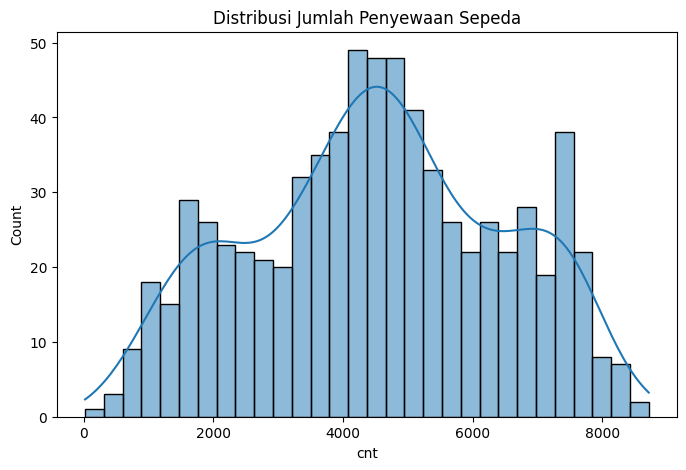

In [16]:
#melihat distribusi data penyewaan
plt.figure(figsize=(8, 5))
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title("Distribusi Jumlah Penyewaan Sepeda")
plt.show()

In [17]:
#agregasi data berdasarkan tahun dan musin
season_data = bike.groupby(['yr', 'season'])['cnt'].sum().reset_index()

In [18]:
# Buat kolom baru untuk representasi bulan-tahun (format: YYYY-MM)
bike["month_year"] = bike["dteday"].dt.to_period("M").astype(str)

# Agregasi data berdasarkan bulan-tahun dan cuaca
weather_trend = bike.groupby(["month_year", "weathersit"])["cnt"].sum().reset_index()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Perbandingan Penyewaan atau cnt Berdasarkan Musin atau season per Tahunnya.

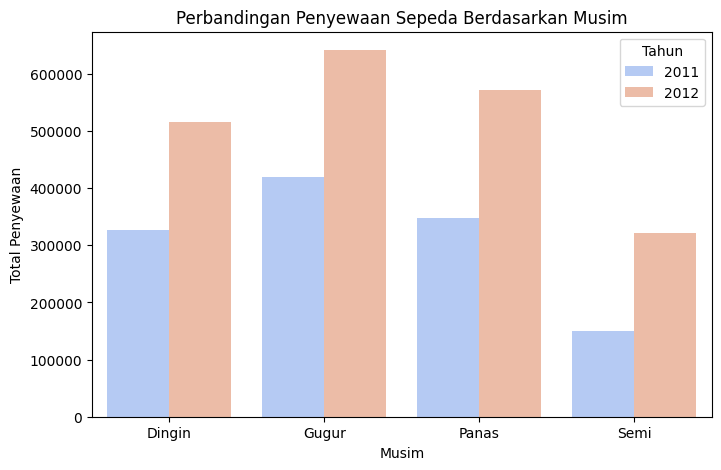

In [19]:
#visualisasi bar chart untuk pertanyaan 1
plt.figure(figsize=(8, 5))
sns.barplot(data=season_data, x="season", y="cnt", hue="yr", palette="coolwarm")
plt.title("Perbandingan Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Total Penyewaan")
plt.legend(title="Tahun")
plt.show()


### Pertanyaan 2: Bagaimana Trend Dari Penyewaan atau cnt Berdasarkan Cuaca atau weathersit.

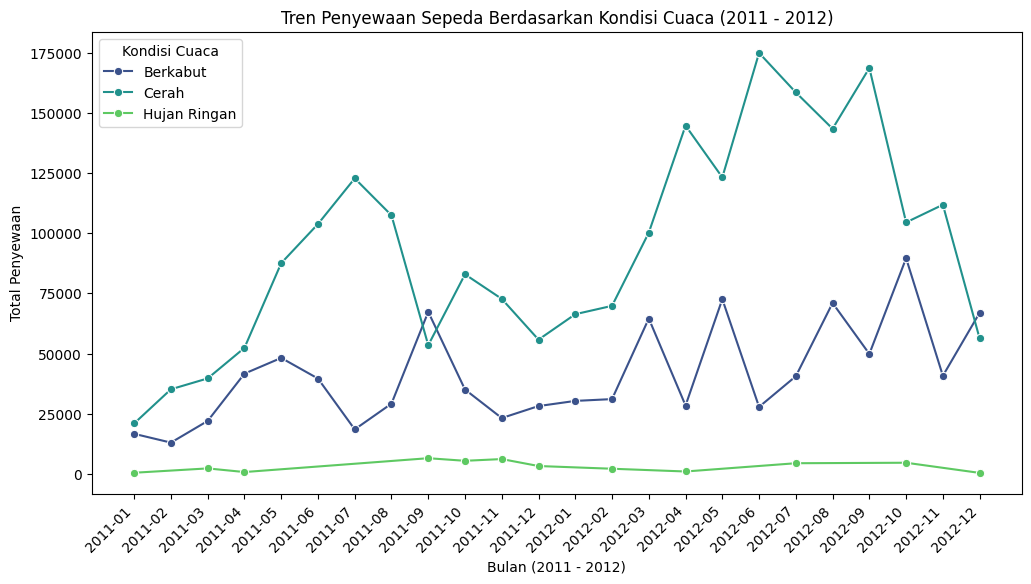

In [20]:
#visualisasi bar chart untuk pertanyaan 1
plt.figure(figsize=(12, 6))
sns.lineplot(data=weather_trend, x="month_year", y="cnt", hue="weathersit", marker="o", palette="viridis")

plt.xticks(rotation=45, ha="right")
plt.xlabel("Bulan (2011 - 2012)")
plt.ylabel("Total Penyewaan")
plt.title("Tren Penyewaan Sepeda Berdasarkan Kondisi Cuaca (2011 - 2012)")
plt.legend(title="Kondisi Cuaca")
plt.show()

**Insight:**
- Untuk pertanyaan 1, dalam membuat perbandingan Penyewaan berdasarkan musim per tahunnya menggunakan bar chart untuk membandingkan antar kategori
- Untuk pertanyaan 2, dalam membuat trend Penyewaan berdasarkan cuaca menggunakan line chart untuk menunjukan perubahan data per waktu

## Conclusion

**- Conclution pertanyaan 1**
Dari visualisasi yang dihasilkan menggunakan bar chart, maka dapat disimpulkan bahwa pada setiap musim gugur penyewaan sepeda lebih tinggi dibandingkan dengan musim lainnya dan pada setiap musim semi merupakan musim dengan tingkat penyewaan paling rendah dibandingkan dengan musim lainnya. Tingkat penyewaan untuk setiap musim juga meningkat dari pada tahun sebelumnya

**- conclution pertanyaan 2**
Dari visualisasi yang dihasilkan menggunakan line chart, maka dapat disimpulkan bahwa tren penyewaan sepeda per tahunnya akan mulai naik di awal tahun, kemudian rentang pada bulan 6-8 merupakan rentang bulan dengan tren penjualan tinggi yang kemudian akan mulai terjadi penurunan tren setelah bulan 8 hingga akhir tahun. Tingkat Penyewaan sangat tinggi ketika cuaca cerah dan sangat rendah ketika hujan ringan

In [21]:
import pickle

bike.to_pickle('bike.pickle')
